In [1]:
from FNN import dataprocessing
from FNN import freezingmodel, train_loop, test_loop
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import pickle
from pathlib import Path
%matplotlib inline

In [2]:
torch.cuda.empty_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

True


In [3]:
# import pathlib
#
# def rename_files(directory_path):
#     directory = pathlib.Path(directory_path)
#
#     for file in directory.glob('*.csv'):
#         filename_parts = file.stem.split('_')  # split the filename into parts
#         new_filename = f'{filename_parts[0]}_{filename_parts[3]}.csv'
#         file.rename(directory / new_filename)
#
# # Replace 'directory_path' with your actual directory path
# rename_files('/home/ryansenne/Data/RLS_Team_Data/NN_Training/Anymaze')

In [3]:
# path = Path("/home/ryansenne/Data/RLS_Team_Data/NN_Training")
# any_dir = path / "Anymaze"
# dlc_dir = path / "DLC"
#
# any_files = [x.name for x in any_dir.iterdir()]
# dlc_files= [x.name for x in dlc_dir.iterdir()]
#
# common_files = set(any_files) & set(dlc_files)
#
# any_files = [any_dir / x for x in any_files if x in common_files]
# dlc_files = [dlc_dir / x for x in dlc_files if x in common_files]

In [4]:
# raw = dataprocessing.BehavioralDataManager(any_files, dlc_files)
# raw.process_data()

/home/ryansenne/PycharmProjects/PyTorch/FNN/dataprocessing/preprocess.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.filtered_df[(f'angle_{bpart1}_{bpart2}_{bpart3}', 'angle')] = np.degrees(angle)
/home/ryansenne/PycharmProjects/PyTorch/FNN/dataprocessing/preprocess.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.filtered_df[(f'angle_{bpart1}_{bpart2}_{bpart3}', 'angle')] = np.degrees(angle)
/home/ryansenne/PycharmProjects/PyTorch/FNN/dataprocessing/preprocess.py:143: PerformanceWarning: DataFrame is highl

(       angle_back_l_paw_back_r_paw_base_of_tail  \
                                           angle   
 0                                      0.429692   
 1                                      0.429431   
 2                                      0.429526   
 3                                      0.429610   
 4                                      0.430299   
 ...                                         ...   
 427146                                -1.373012   
 427147                                -1.371787   
 427148                                -1.370610   
 427149                                -1.369428   
 427150                                -1.368306   
 
        angle_back_l_paw_back_r_paw_tip_of_tail  \
                                          angle   
 0                                     0.728585   
 1                                     0.728642   
 2                                     0.728697   
 3                                     0.728730   
 4              

In [3]:
# with open("data.pkl", "rb") as f:
#     features, labels = pickle.load(f)

# kf_est = raw.features
# freeze = raw.labels
# X_train, X_test, y_train, y_test = train_test_split(kf_est.to_numpy(), freeze.to_numpy(), train_size=0.80)
# with open("train_test.pkl", "wb") as f:
#     pickle.dump((X_train, X_test, y_train, y_test), f)


NameError: name 'raw' is not defined

In [3]:
with open("train_test.pkl", "rb") as f:
    X_train, X_test, y_train, y_test = pickle.load(f)

In [6]:
features = torch.tensor(X_train, dtype=torch.float32).to(device)
labels = torch.tensor(y_train, dtype=torch.float32).to(device)

test_features = torch.tensor(X_test, dtype=torch.float32).to(device)
test_labels = torch.tensor(y_test, dtype=torch.float32).to(device)

data = freezingmodel.dataset(features, labels)
train_dataloader = DataLoader(data, batch_size=100, shuffle=True)

test_data = freezingmodel.dataset(test_features, test_labels)
test_dataloader = DataLoader(test_data, batch_size=100, shuffle=True)


input_size = 174
# device = torch.device('cuda')
nn_model = freezingmodel.net(input_size).to(device)
# nn_model.load_state_dict(torch.load("freeze_network_model_params.pth"))


criterion = nn.BCELoss()
optimizer = optim.SGD(nn_model.parameters(), lr=0.005, weight_decay=0.001)


epochs = 500
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model=nn_model, loss_fn=criterion, dict_fp="freeze_network_model_params.pth", optimizer=optimizer)
    test_loop(test_dataloader, model=nn_model, loss_fn=criterion)
print("Done!")

/home/ryansenne/PycharmProjects/PyTorch/FNN/freezingmodel/model.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x = torch.tensor(x, dtype=torch.float32)
/home/ryansenne/PycharmProjects/PyTorch/FNN/freezingmodel/model.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y = torch.tensor(y, dtype=torch.float32)


Epoch 1
-------------------------------
loss: 0.657923  [  100/341720]
loss: 0.645260  [10100/341720]
loss: 0.626371  [20100/341720]
loss: 0.621802  [30100/341720]
loss: 0.654492  [40100/341720]
loss: 0.648308  [50100/341720]
loss: 0.637615  [60100/341720]
loss: 0.603617  [70100/341720]
loss: 0.619367  [80100/341720]
loss: 0.671054  [90100/341720]
loss: 0.647102  [100100/341720]
loss: 0.690496  [110100/341720]
loss: 0.652786  [120100/341720]
loss: 0.586334  [130100/341720]
loss: 0.627053  [140100/341720]
loss: 0.611960  [150100/341720]
loss: 0.709713  [160100/341720]
loss: 0.605857  [170100/341720]
loss: 0.660900  [180100/341720]
loss: 0.619767  [190100/341720]
loss: 0.618373  [200100/341720]
loss: 0.660214  [210100/341720]
loss: 0.626683  [220100/341720]
loss: 0.524413  [230100/341720]
loss: 0.581942  [240100/341720]
loss: 0.598164  [250100/341720]
loss: 0.674326  [260100/341720]
loss: 0.668099  [270100/341720]
loss: 0.612413  [280100/341720]
loss: 0.618394  [290100/341720]
loss: 0.61

In [10]:
nn_model = freezingmodel.net(174).to(device)
nn_model.load_state_dict(torch.load("freeze_final_.pth"))

# Evaluation
nn_model.eval()  # Set the model to evaluation mode
total_correct = 0
total_samples = 0


features = torch.tensor(X_test, dtype=torch.float32).to(device)
labels = torch.tensor(y_test, dtype=torch.float32).to(device)

data = freezingmodel.dataset(features, labels)
data_loader_test = DataLoader(data, batch_size=1, shuffle=True)

with torch.no_grad():
    for batch_features, batch_labels in data_loader_test:
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)

        # Forward pass
        outputs = nn_model(batch_features)
        predicted_labels = torch.round(outputs)

        # Count correct predictions
        total_correct += (predicted_labels == batch_labels).sum().item()
        total_samples += batch_labels.size(0)

accuracy = total_correct / total_samples
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 67.48%


In [12]:
new_data = dataprocessing.BehavioralDataManager(["/home/ryansenne/Downloads/m10_new_shock_recall_freeze.csv"], ["/home/ryansenne/Downloads/Test_Video_m10_recall_120122-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv"])
df, a = new_data.process_data()



/home/ryansenne/PycharmProjects/PyTorch/FNN/dataprocessing/preprocess.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.filtered_df[(f'angle_{bpart1}_{bpart2}_{bpart3}', 'angle')] = np.degrees(angle)
/home/ryansenne/PycharmProjects/PyTorch/FNN/dataprocessing/preprocess.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.filtered_df[(f'angle_{bpart1}_{bpart2}_{bpart3}', 'angle')] = np.degrees(angle)
/home/ryansenne/PycharmProjects/PyTorch/FNN/dataprocessing/preprocess.py:143: PerformanceWarning: DataFrame is highl

In [13]:
df

tensor([[ 1.0150, -0.3935, -0.4002,  ..., -0.0905,  1.5248, -1.7712],
        [ 1.0150, -0.3935, -0.4002,  ..., -0.0905,  1.5248, -1.7712],
        [ 1.0150, -0.3934, -0.4002,  ..., -0.0905,  1.5248, -1.7712],
        ...,
        [ 0.7224, -0.9226, -1.1893,  ..., -0.1387,  0.9732, -1.1498],
        [ 0.7226, -0.9225, -1.1890,  ..., -0.1426,  0.9756, -1.1530],
        [ 0.7227, -0.9224, -1.1887,  ..., -0.1466,  0.9781, -1.1562]],
       device='cuda:0')

In [13]:
# n_model = freezingmodel.net(54).to(device)
# nn_model.load_state_dict(torch.load("freeze.pth"))
df = torch.tensor(new_data.features.to_numpy(), dtype=torch.float32).to(device)

nn_model = freezingmodel.net(174).to(device)
nn_model.load_state_dict(torch.load("freeze_new.pth"))
nn_model.eval()  # Sets the model to evaluation mode
# Forward pass through the model to get the predictions
with torch.no_grad():  # Disables gradient calculation to save memory
    predictions = nn_model(df)

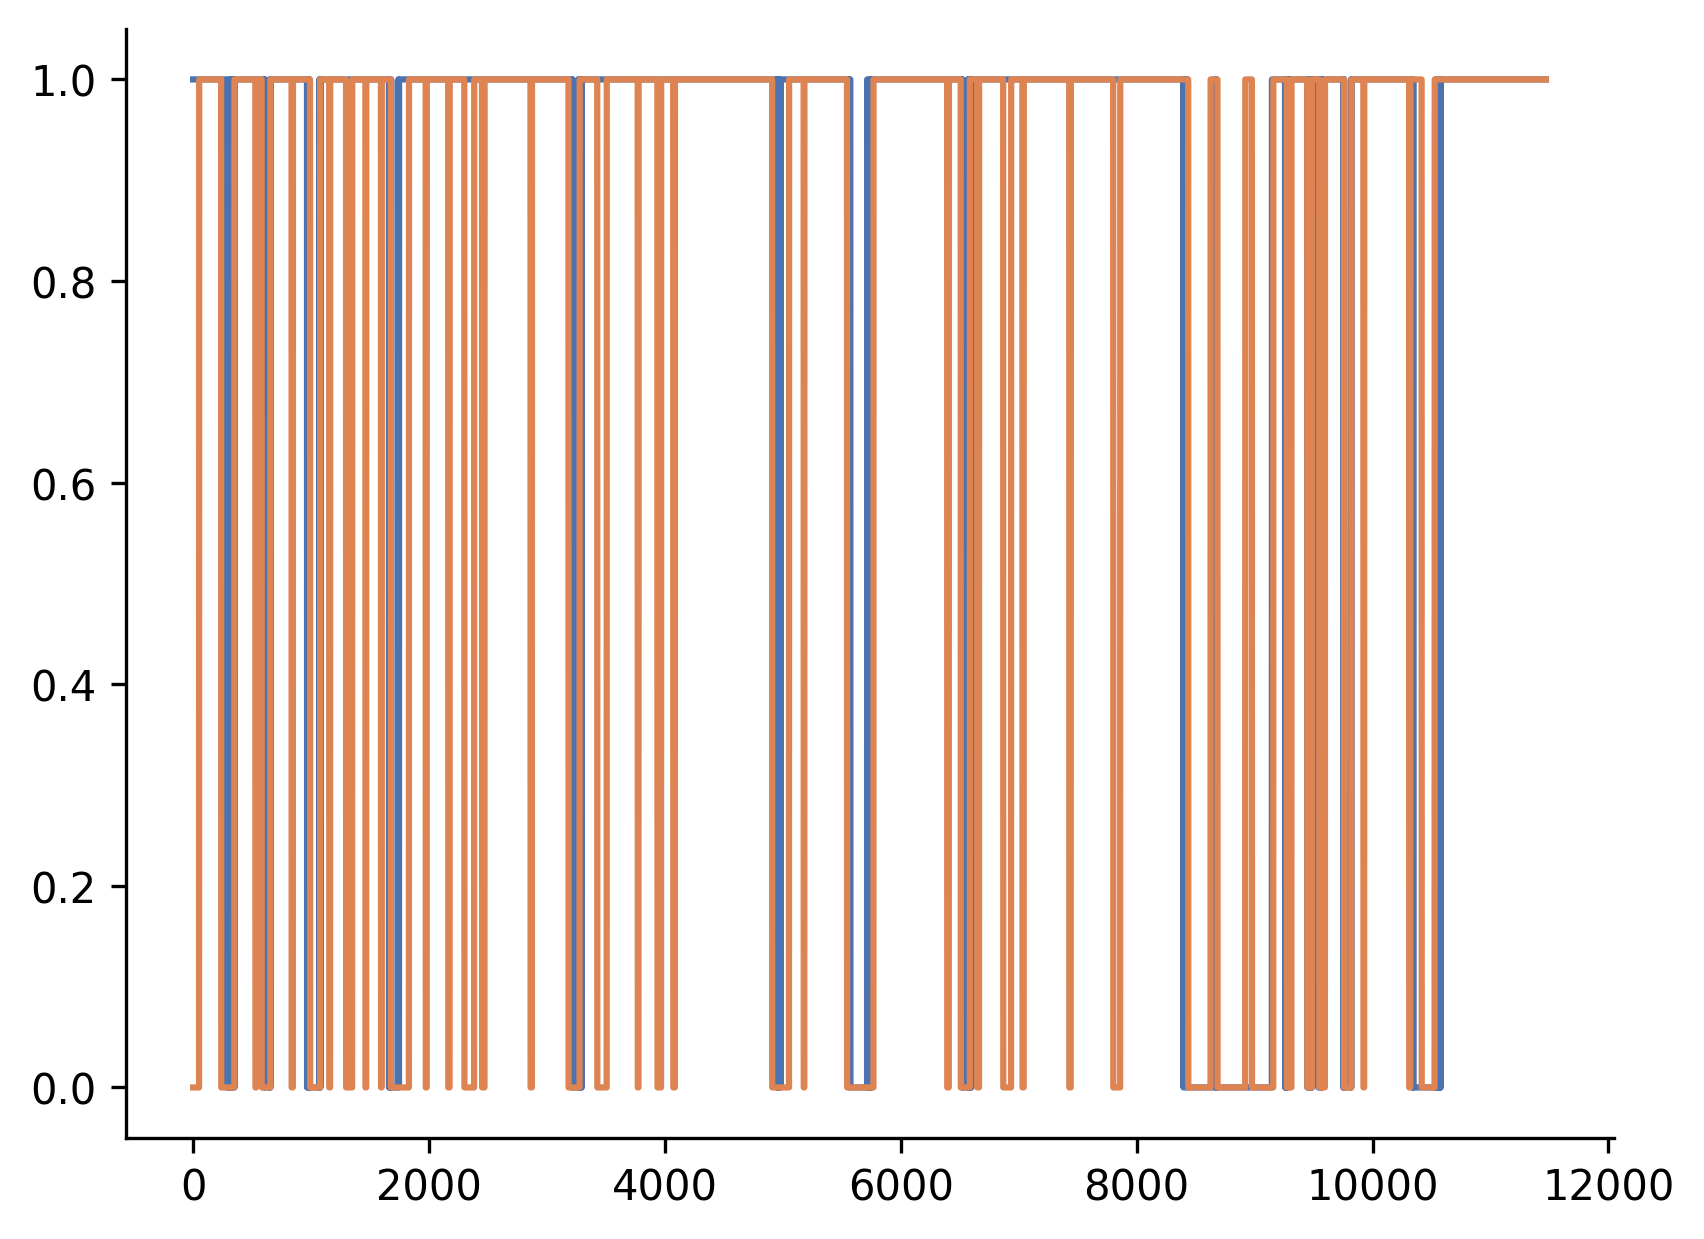

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(torch.round(predictions.cpu()))
plt.plot(a)